In [4]:
import glob
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from PIL import Image
from tkinter import Tcl
from sklearn import preprocessing

%matplotlib inline

le = preprocessing.LabelEncoder()

# Load list of labels/classes
with open('./data/cifar-10-binary/cifar-10-batches-bin/batches.meta.txt', 'r') as f:
    labels = [line.rstrip() for line in f]

print("=========== Classes ===========")
for i in range(len(labels)-1): print(i,":", labels[i])

=========== Classes ===========
0 : airplane
1 : automobile
2 : bird
3 : cat
4 : deer
5 : dog
6 : frog
7 : horse
8 : ship
9 : truck


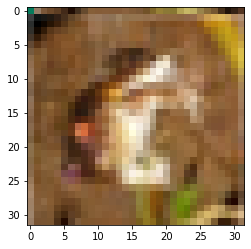

In [6]:
from __future__ import print_function
from imageio import imsave
import os, sys, tarfile, errno, urllib

# image shape
HEIGHT = 32
WIDTH = 32
DEPTH = 3

# size of a single image in bytes
SIZE = HEIGHT * WIDTH * DEPTH

DATA_PATH = './data/cifar-10-binary/cifar-10-batches-bin/data_batch_1.bin'

def read_single_image(image_file):
    image = np.fromfile(image_file, dtype=np.uint8, count=SIZE)
    image = np.reshape(image, (3, 32, 32))
    image = np.transpose(image, (2, 1, 0))
    return image

def read_all_images(path_to_data):
    with open(path_to_data, 'rb') as f:
        everything = np.fromfile(f, dtype=np.uint8)
        images = np.reshape(everything, (-1, 3, 32, 32))
        images = np.transpose(images, (0, 3, 2, 1))
        return images

def plot_image(image):
    plt.imshow(image)
    plt.show()

with open(DATA_PATH) as f:
    image = read_single_image(f)
    plot_image(image)

In [7]:
import pickle
import numpy as np

DATA_PATH = './datasets/cifar-10-python/cifar-10-batches-py'
#DATA_PATH = './data/cifar-10-binary/cifar-10-batches-bin/data_batch_1.bin'
LABELS_PATH = DATA_PATH + '/batches.meta'
BATCHES_PATH = ['/data_batch_1', '/data_batch_2', '/data_batch_3', '/data_batch_4', '/data_batch_5', '/test_batch']

with open(LABELS_PATH, 'rb') as fo:
    batches_meta = pickle.load(fo)
    labels = batches_meta['label_names']
    
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

print("=========== Classes ===========")
for i in range(len(labels)): print(i,":", labels[i])
print("\n# of Cases Per Batch:", batches_meta['num_cases_per_batch'])
print("# Vis:", batches_meta['num_vis'])

=========== Classes ===========
0 : airplane
1 : automobile
2 : bird
3 : cat
4 : deer
5 : dog
6 : frog
7 : horse
8 : ship
9 : truck

# of Cases Per Batch: 10000
# Vis: 3072


In [8]:
def cleanDict(batch_dict):
    for i in list(batch_dict.keys()): batch_dict[i.decode()] = batch_dict.pop(i)
    batch_dict['batch_label'] = batch_dict['batch_label'].decode()
    for i in range(len(list(batch_dict['filenames']))): batch_dict['filenames'][i] = batch_dict['filenames'][i].decode()
    return batch_dict
    
batch_1 = cleanDict(unpickle(DATA_PATH + BATCHES_PATH[0]))
batch_2 = cleanDict(unpickle(DATA_PATH + BATCHES_PATH[1])) 
batch_3 = cleanDict(unpickle(DATA_PATH + BATCHES_PATH[2]))
batch_4 = cleanDict(unpickle(DATA_PATH + BATCHES_PATH[3]))
batch_5 = cleanDict(unpickle(DATA_PATH + BATCHES_PATH[4]))

b1 = batch_1['data']
#b1
b1s = np.array(b1, dtype=np.uint8)

In [9]:
import matplotlib.pyplot as plt

# image shape
HEIGHT = 32
WIDTH = 32
DEPTH = 3

# size of a single image in bytes
SIZE = HEIGHT * WIDTH * DEPTH

def read_all_images(b):
    images = np.reshape(b, (-1, 3, 32, 32))
    images = np.transpose(images, (0, 3, 2, 1))
    return images

def read_single_image(image_file):
    image = np.fromfile(image_file, dtype=np.uint8, count=SIZE)
    #image = np.array(image_file, dtype=np.uint8, count=SIZE)
    
    image = np.reshape(image, (3, 32, 32))
    image = np.transpose(image, (2, 1, 0))
    return image

def plot_image(image):
    plt.imshow(image)
    plt.show()

In [10]:
images = read_all_images(DATA_PATH + BATCHES_PATH[0])
print(images.shape)

# image = read_single_image(b1)
# plot_image(image)

ValueError: cannot reshape array of size 1 into shape (3,32,32)